# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load data

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Understanding Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Preprocessing

In [19]:
from sklearn import preprocessing

In [20]:
lb = preprocessing.LabelBinarizer()

In [21]:
data['Genre']=lb.fit_transform(data['Genre'])

In [22]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Exploratory Data Analysis

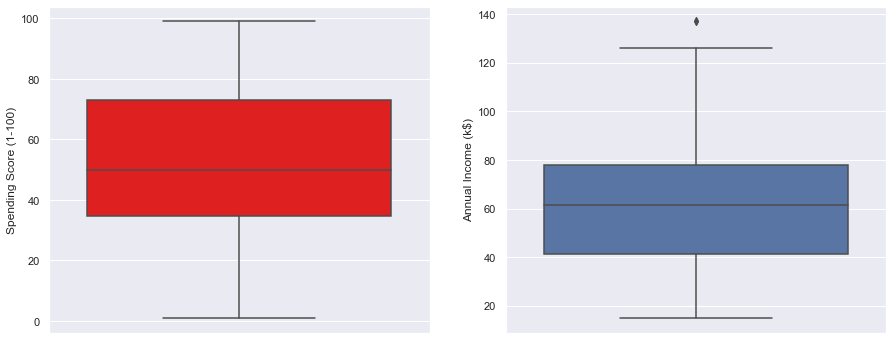

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=data["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=data["Annual Income (k$)"])
plt.show()

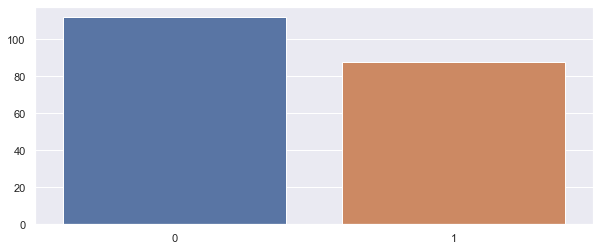

In [25]:
genders = data['Genre'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

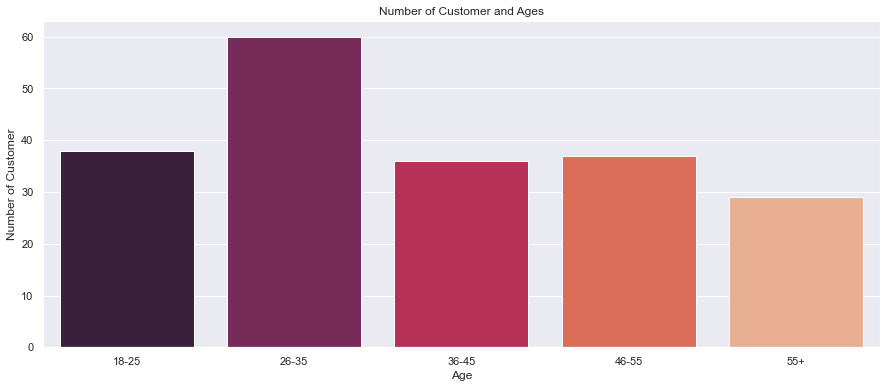

In [26]:
age18_25 = data['Age'][(data['Age'] <= 25) & (data['Age'] >= 18)]
age26_35 = data['Age'][(data['Age'] <= 35) & (data['Age'] >= 26)]
age36_45 = data['Age'][(data['Age'] <= 45) & (data['Age'] >= 36)]
age46_55 = data['Age'][(data['Age'] <= 55) & (data['Age'] >= 46)]
age55above = data['Age'][data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

continued with making a bar plot to visualize the number of customers according to their spending scores. The majority of the customers have spending score in the range 41–60.

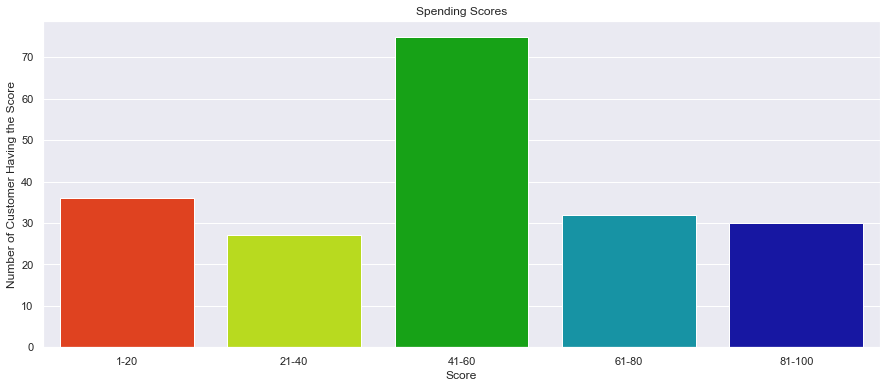

In [27]:
ss1_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 1) & (data["Spending Score (1-100)"] <= 20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 21) & (data["Spending Score (1-100)"] <= 40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 41) & (data["Spending Score (1-100)"] <= 60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 61) & (data["Spending Score (1-100)"] <= 80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >= 81) & (data["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

made a bar plot to visualize the number of customers according to their annual income. The majority of the customers have annual income in the range 60000 and 90000

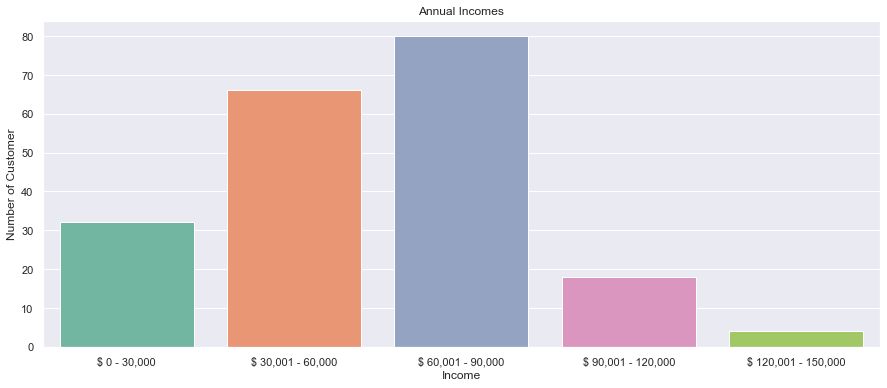

In [28]:
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

Text(0, 0.5, 'Spending Score (1-100)')

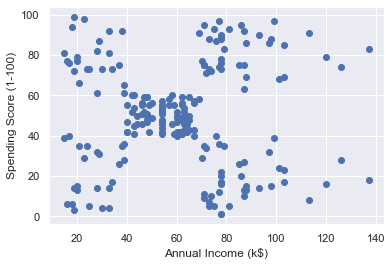

In [29]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

 Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of distances of observations from their cluster centroids which is given by the below formula.



# Model Building

In [30]:
from sklearn.cluster import KMeans

In [31]:
x=data.copy()
kmeans=KMeans(2)

In [32]:
clusters=x.copy()
clusters['clusters_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Spending Score (1-100)')

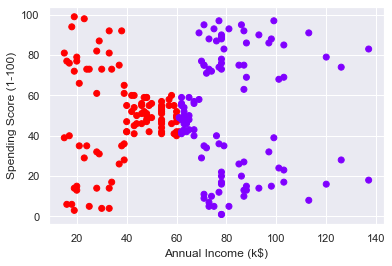

In [33]:
plt.scatter(clusters['Annual Income (k$)'],clusters['Spending Score (1-100)'],c=clusters['clusters_pred'],cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Model Evalution

In [35]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit_predict(x)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\my\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[975512.06,
 387065.7137713772,
 271384.50878286787,
 195401.19855991477,
 157505.7207247758,
 122630.44175335614,
 103254.37701808,
 86004.02533022528,
 77010.1590581194]

# The Elbow Method

Text(0, 0.5, 'wcss')

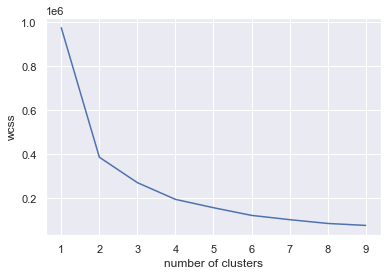

In [36]:
plt.plot(range(1,10),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [37]:
def kmeans_cluster(cluster):
    kmeans1=KMeans(cluster)
    identified_clusters=kmeans1.fit_predict(x)
    data_with_cluster=data.copy()
    data_with_cluster['cluster']=identified_clusters
    plt.scatter(data_with_cluster['Annual Income (k$)'],data_with_cluster['Spending Score (1-100)'],
           c=data_with_cluster['cluster'],cmap='rainbow')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.show()

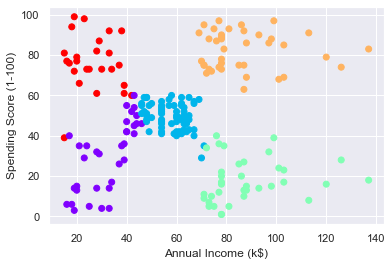

In [38]:
kmeans_cluster(5)